# 06. Model Evaluation & Improvement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import feature_selection

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

In [2]:
df = pd.read_csv('/users/alfon/Desktop/Master/TFM/CSV/04.cars_features_def.csv')
df.head()


,Year,Kms,Hp,Fuel_cons,Doors,Gear_type_Automatic,Gear_type_Manual,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Electric,...,Type_small,Type_suv,Type_van,Seller_Dealer,Seller_Private,Brand_encoded,Model_encoded,Colour_encoded,Province_encoded,Price_EUR
0,2006,182510,68,4.4,5,0,1,0,1,0,...,1,0,0,1,0,10412.196983,8547.619048,15207.210252,22252.941248,2400
1,2017,67478,125,4.9,5,0,1,0,0,0,...,1,0,0,1,0,25546.556757,16731.591241,15207.210252,22252.941248,14990
2,2007,31510,98,6.6,5,0,1,0,0,0,...,1,0,0,1,0,11099.399408,9136.680000,15207.210252,22252.941248,4950
3,2017,34985,92,0.0,5,1,0,0,0,1,...,1,0,0,1,0,11099.399408,10966.931096,15207.210252,22252.941248,10830
4,2006,83700,174,6.2,5,0,1,0,0,0,...,1,0,0,1,0,17251.958184,19240.750000,15207.210252,22252.941248,9800


In [3]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [4]:
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [5]:
for model in [lr, dt, rf]:
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print('\n' + str(model) + '\n--------')
    for metric in [mean_absolute_error, 
                   mean_absolute_percentage_error, 
                   mean_squared_error, 
                   explained_variance_score]:
        
        print(metric(y_test, predictions))


LinearRegression()
--------
7372.332885245852
0.5543654120906143
905211550.7072233
0.6486730173384534

DecisionTreeRegressor()
--------
4414.190997055111
0.1969539768328649
966907901.5574254
0.6246180370932569

RandomForestRegressor()
--------
3325.285143842111
0.143812194572457
689361010.5976405
0.7324147561349008


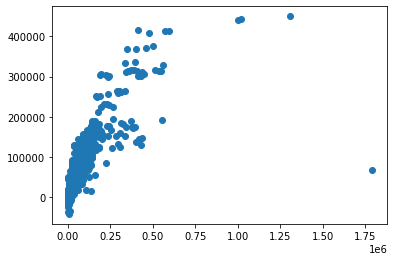

In [6]:
plt.scatter(y_test,lr.predict(X_test))

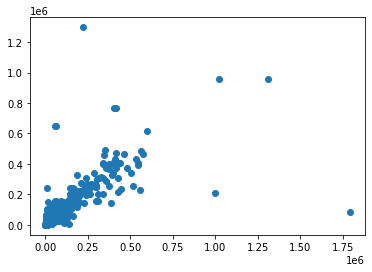

In [7]:
plt.scatter(y_test,dt.predict(X_test))

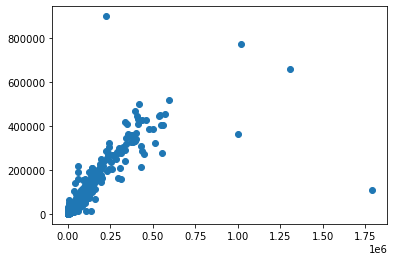

In [8]:
plt.scatter(y_test,rf.predict(X_test))

## K Fold Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score


In [10]:
for model in [lr, dt, rf]:
    
    results = cross_val_score(model, X_train, y_train, cv=5)
    
    print("\n" + str(model) + f"\n Cross Val Score {np.mean(results)}" + f"\n Std {np.std(results)}" + f"\n Results {results}")


LinearRegression()
 Cross Val Score 0.7613030038830673
 Std 0.062384271605662484
 Results [0.78820426 0.75048999 0.80544721 0.81737176 0.64500179]

DecisionTreeRegressor()
 Cross Val Score 0.8004498315276749
 Std 0.02947728015537237
 Results [0.83538485 0.75036577 0.8052586  0.8220379  0.78920203]

RandomForestRegressor()
 Cross Val Score 0.8624569297198498
 Std 0.036967525497765344
 Results [0.88994807 0.81909784 0.87923236 0.90624903 0.81775734]


Pros

* Estimation of variance of our model
* Better use of data

Cons

* Computational cost

In [11]:
# Models for this study
models = []
models.append(('lr', LinearRegression()))
models.append(('dt', DecisionTreeRegressor()))
models.append(('rf', RandomForestRegressor()))



# Defining columns
names = []
results = []
minimums = []
means = []
stds = []
maximums = []

scoring = 'r2'

# Defining the algorithm function
def cross_val_algorithm(name, model):
    '''
    Function that runs the cross-validation (CV) for the named algorithm
    - name: Designation of the algorithm. 
    - model: Algorithm to be applied.
    '''
    kfold = model_selection.KFold(n_splits=5, shuffle=True)
    cv_results = model_selection.cross_val_score(estimator=model,
                                                 X=X,
                                                 y=y,
                                                 cv=kfold,
                                                 scoring=scoring)
    
    # Appending each iteration to the lists created above
    names.append(name)
    results.append(cv_results)
    minimums.append(cv_results.min())
    means.append(cv_results.mean())
    stds.append(cv_results.std())
    maximums.append(cv_results.max())

# Running the algorithm for each model in the list designated
for name, model in models:

    cross_val_algorithm(name, model)

# Creating a DataFrame :
models_df = pd.DataFrame({'model': names,
                          'minimum_r2': minimums,
                          'mean_r2': means,
                          'maximum_r2': maximums,
                          'std_r2': stds})


models_df 



,model,minimum_r2,mean_r2,maximum_r2,std_r2
0,lr,0.616805,0.741592,0.812947,0.076050
1,dt,0.323472,0.661356,0.838730,0.179224
2,rf,0.701179,0.839085,0.943224,0.090137


In [12]:
import seaborn as sns

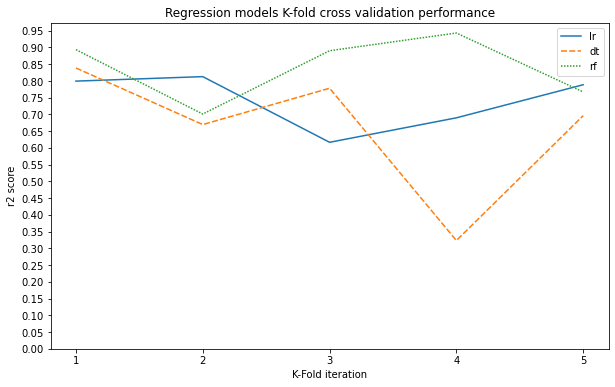

In [13]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=results, dashes=True)

plt.title('Regression models K-fold cross validation performance')
plt.xticks(list(range(0, 5)), list(range(1, 6)))
plt.xlabel('K-Fold iteration')
plt.yticks(np.arange(0, 1, .05))
plt.ylabel('r2 score')

plt.legend(names)


plt.show()

/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_52504/3574728069.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


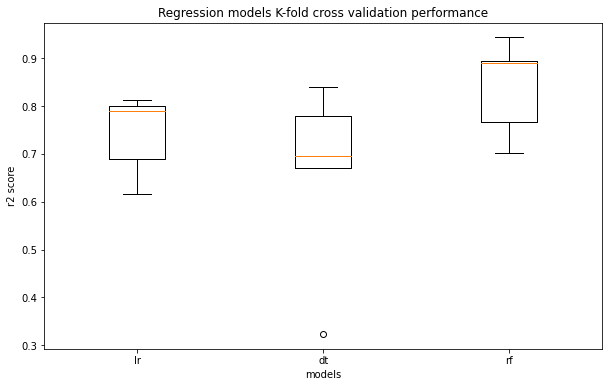

In [14]:
fig , ax1 = plt.subplots(figsize=(10,6))
ax1.set_title("Regression models K-fold cross validation performance")
ax1.set_xlabel('models') 
ax1.set_ylabel('r2 score') 
labels = names
ax1.boxplot(results) 
ax1.set_xticklabels(labels)

fig.show()

In [15]:
models_df.set_index('model', inplace = True)

(array([0, 1, 2]), [Text(0, 0, 'lr'), Text(1, 0, 'dt'), Text(2, 0, 'rf')])

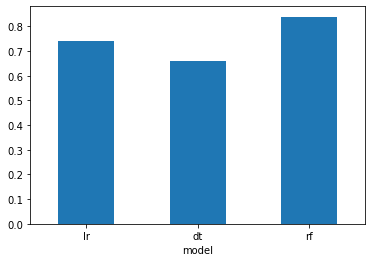

In [16]:
models_df["mean_r2"].plot(kind = "bar")
plt.xticks(rotation=0)



## Based on above results we can say that Random Forest Regressor gives the best score.

## RandomizedSearchCV

In [35]:
df = pd.read_csv('/users/alfon/Desktop/Master/TFM/CSV/04.cars_features_def.csv')


In [36]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [37]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .2)

In [38]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8829693937288594

In [39]:
cv = 5

In [40]:
def perfect_model(X, y):
    
    model_algo = {
      

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [x for x in range(20,150,20)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1, 2, 5, 10]}}}
  
    score = []
    cv = 5
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(X_train,y_train)
        score.append({
              'model': algo_name,
              'best_score': rs.best_score_,
              'best_params': rs.best_params_})

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [41]:
perfect_model(X, y)

[{'n_estimators': 120, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25}]


,model,best_score,best_params
0,Random_forest,0.814585,"{'n_estimators': 120, 'min_samples_split': 15,..."


In [43]:
rf = RandomForestRegressor(n_estimators=120, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=25)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.889677733952567

In [44]:
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=25), X,y,cv=cv)

array([0.84431608, 0.63977682, 0.95118569, 0.80100804, 0.72546129])

## Exporting the tested model to a pickle file

In [45]:
import pickle

with open('RF_price_predicting_model.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(rf, file)

In [46]:
import bz2
import pickle
import _pickle as cPickle

In [47]:
with bz2.BZ2File('RF_price_predicting_model.pkl' + '.pbz2', 'w') as file: 
        cPickle.dump(rf, file)